In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-analysis/supermarket_sales.csv


In [3]:
import pandas as pd

# Load dataset
data = pd.read_csv('/kaggle/input/customer-analysis/supermarket_sales.csv')
print(data)

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155  

In [4]:
print(data.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
print(data.describe())

        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   4.761905      5.924875   

In [8]:
# Check for missing values
print(data.isnull().sum())




Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [19]:
# Select numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns

# Fill missing values with median for numeric columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())
# Example for filling missing values in non-numeric columns with the most frequent value
non_numeric_cols = data.select_dtypes(exclude=['number']).columns

for col in non_numeric_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)  # Fill with the most frequent value
# Drop duplicate rows
data.drop_duplicates(inplace=True)
# Check for missing values and duplicates
print(data.isnull().sum())
print(data.duplicated().sum())
# Check data types of each column
print(data.dtypes)



Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64
0
Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gr

/tmp/ipykernel_36/3321434113.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)  # Fill with the most frequent value


In [23]:
import re
import pandas as pd
from nltk.corpus import stopwords

# Example DataFrame
data = pd.DataFrame({
    'comments': ["Great service!!", "Terrible experience...", "Will come again :)"]
})

# Define a function to clean comments
def clean_text(text):
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply the cleaning function to the 'comments' column
data['cleaned_comments'] = data['comments'].apply(clean_text)

# Convert to lowercase and remove stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

data['cleaned_comments'] = data['cleaned_comments'].apply(remove_stopwords)

print(data)



                 comments     cleaned_comments
0         Great service!!        great service
1  Terrible experience...  terrible experience
2      Will come again :)                 come


In [24]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

data['sentiment'] = data['cleaned_comments'].apply(get_sentiment)


In [64]:
# Group by sentiment and count occurrences
sentiment_distribution = data['sentiment'].value_counts()
print(sentiment_distribution)
# Group by sentiment and count the number of comments
comments_per_sentiment = data.groupby('sentiment').size()
print(comments_per_sentiment)

# View the first few rows of the DataFrame
print(data.head())


sentiment
positive    1
negative    1
neutral     1
Name: count, dtype: int64
sentiment
negative    1
neutral     1
positive    1
dtype: int64
                 comments     cleaned_comments sentiment
0         Great service!!        great service  positive
1  Terrible experience...  terrible experience  negative
2      Will come again :)                 come   neutral


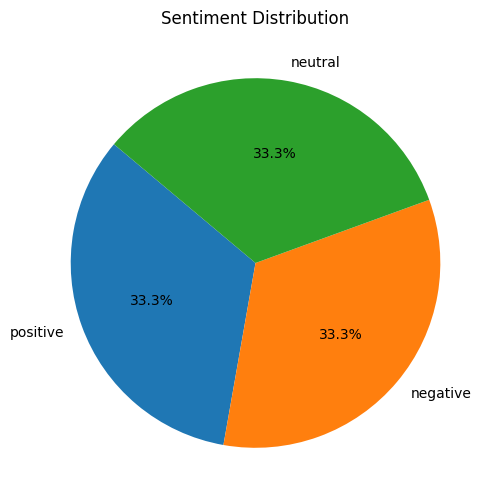

In [65]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Pie chart for sentiment distribution
sentiment_counts = data['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()




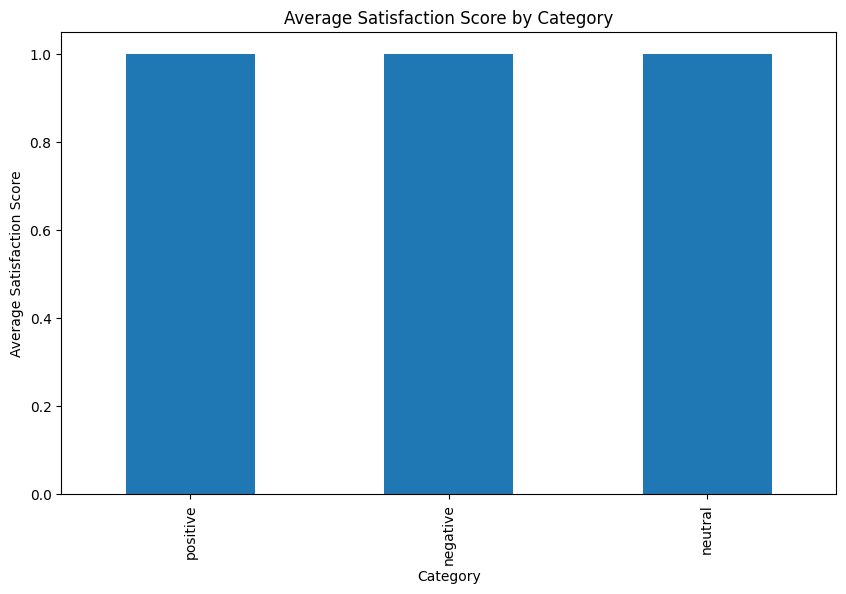

In [67]:
# Bar chart for satisfaction scores by category
sentiment_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Average Satisfaction Score by Category')
plt.xlabel('Category')
plt.ylabel('Average Satisfaction Score')
plt.show()


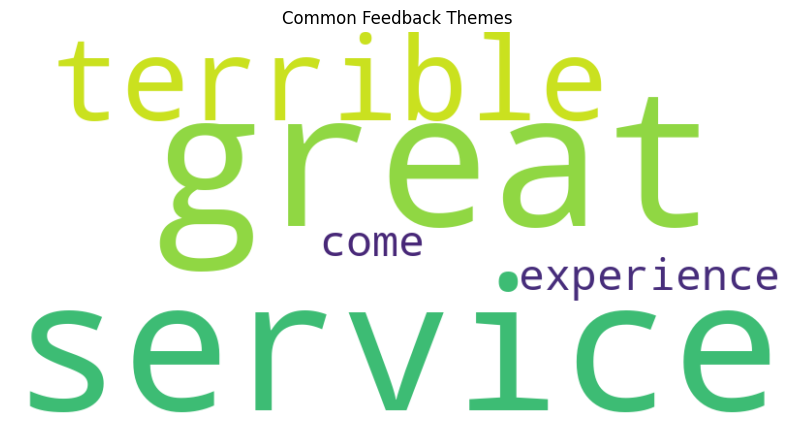

In [68]:
# Word cloud for common feedback themes
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['cleaned_comments']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Feedback Themes')
plt.show()